In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv = pd.read_csv("../T0_With questionaire.csv", sep=";")
print(csv.head(20))

    Respondentnummer  Gender  IC  Zip-code Geboortedatum  \
0             307117     1.0    1      NaN           NaN   
1             307173     0.0    1      NaN           NaN   
2             307174     0.0    1      NaN           NaN   
3             310103     1.0    1      NaN   17.Feb.2017   
4             110240     0.0    1      NaN   22-Oct-2016   
5             219310     0.0    1      NaN   16.Mar.2016   
6             303110     1.0    1      NaN    1.Feb.2016   
7             102184     1.0    1      NaN    4.Feb.2016   
8             103190     1.0    1      NaN   28.Jan.2016   
9             110191     0.0    1      NaN   28.Jan.2016   
10            302121     1.0    1      NaN   19.Nov.2015   
11            302128     0.0    1      NaN   15.Nov.2015   
12            104202     1.0    1      NaN   20.Jan.2016   
13            309122     1.0    1      NaN   28.Sep.2016   
14            303131     0.0    1      NaN   10.Jan.2016   
15            210153     1.0    1  2516 

Visualization of BMI and age (on test date)

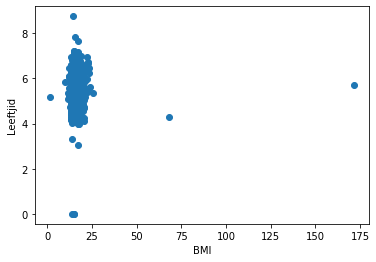

In [10]:
plt.scatter(csv['BMI'], csv['Leeftijd (op testdag)'])
plt.xlabel("BMI")
plt.ylabel("Leeftjid")
plt.show()

In [11]:
print(csv["Leeftijd (op testdag)"].head)

<bound method NDFrame.head of 0       0.00
1       0.00
2       0.00
3       3.03
4       3.33
        ... 
1704     NaN
1705     NaN
1706     NaN
1707     NaN
1708     NaN
Name: Leeftijd (op testdag), Length: 1709, dtype: float64>


Code to ignore outliers and NaN values
Because at this stage the data set is not cleaned yet

In [13]:
# pair-programmed with Joost 
itemcounter = 0
for index, item in csv.iterrows():
    if item['BMI'] > 25:
        itemcounter += 1
        print('Tot nu toe ' + str(itemcounter) + ' te hoge bmi')
        print(item['BMI'])
        #csv['BMI'][item] = str(csv['BMI'][item][0]) + csv['BMI'][item][1] + csv['BMI'][item][2]
        print(index)
        csv.drop(index, inplace=True)
    if item['Leeftijd (op testdag)'] < 4:
        csv.drop(index, inplace=True)
    if item['MQ'] == '#DIV/0!':
        csv.drop(index, inplace=True)

Tot nu toe 1 te hoge bmi
68.09
88
Tot nu toe 2 te hoge bmi
25.57
831
Tot nu toe 3 te hoge bmi
171.67
1142


Visualization of age and time (in sec, that was needed for the test by an individual child)

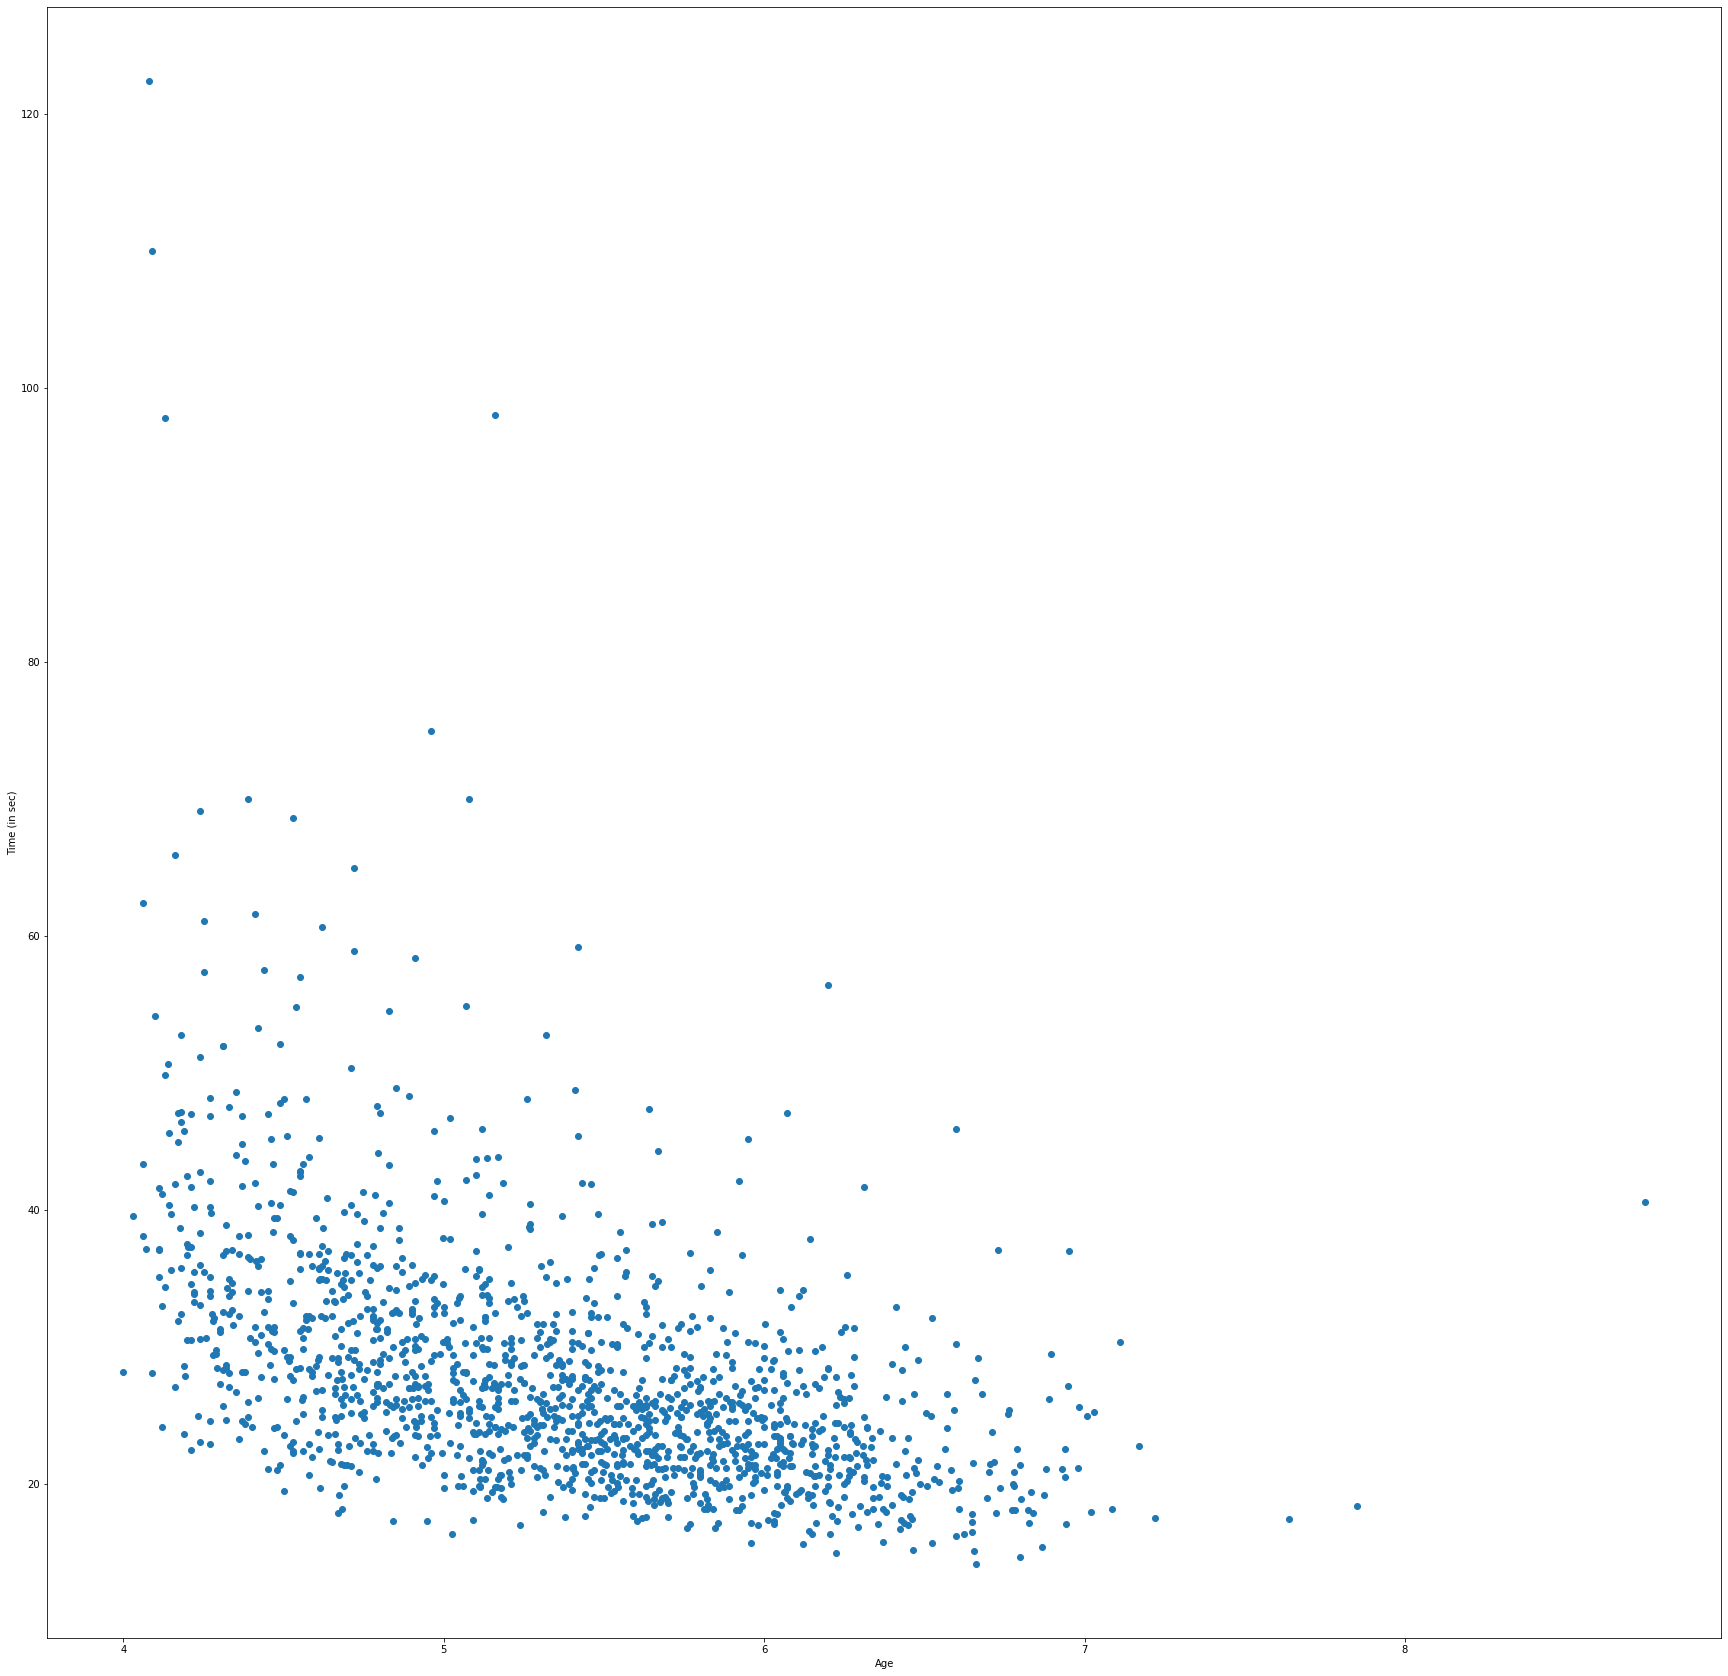

In [14]:
plt.figure(figsize=(30,30))
plt.scatter(csv["Leeftijd (op testdag)"], csv["AST (tijd afgerond op 0.1s)"])
plt.xlabel("Age")
plt.ylabel("Time (in sec)")
plt.show()

Visualization of the MQ score and the time 

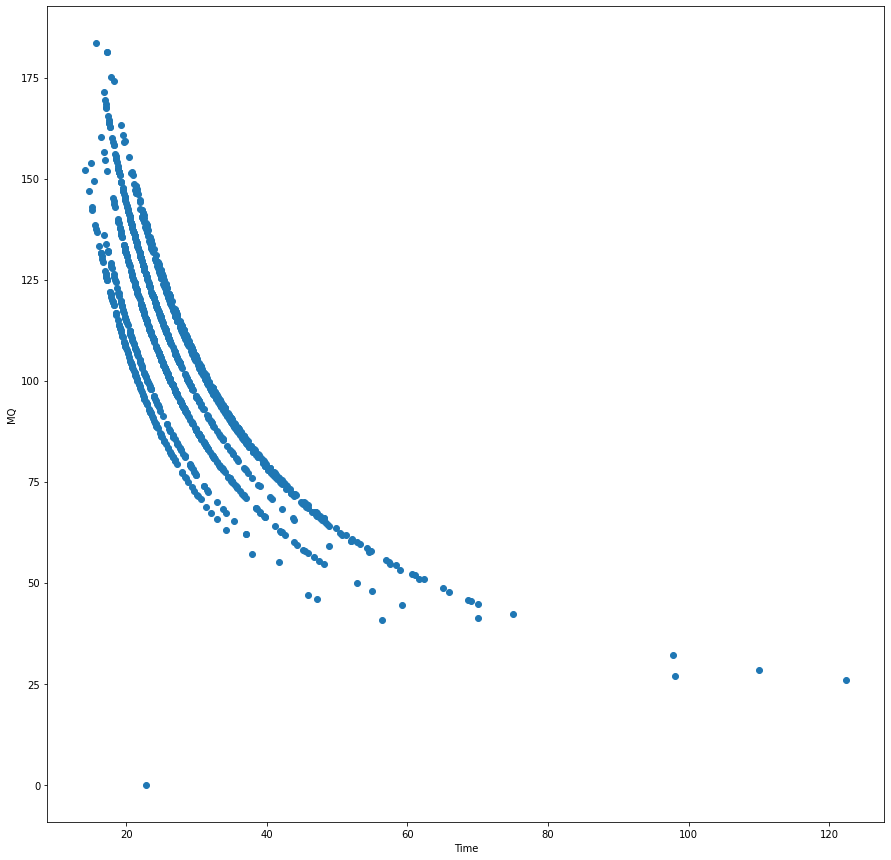

In [15]:
csv.dropna(subset=['MQ'], inplace=True)
csv.round({'MQ': 0})
plt.figure(figsize=(15,15))
plt.scatter(csv["AST (tijd afgerond op 0.1s)"], csv["MQ"])
plt.xlabel("Time")
plt.ylabel("MQ")
plt.show()

Visualization of P.E. and the MQ score

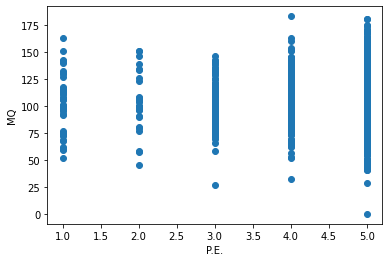

In [16]:
plt.scatter(csv["Gymles"], csv["MQ"])
plt.xlabel("P.E.")
plt.ylabel("MQ")
plt.show()

Visualization of whether the child performs sports or not and the MQ score

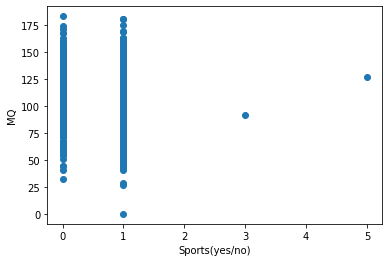

In [17]:
plt.scatter(csv["Sport J/N"], csv["MQ"])
plt.xlabel("Sports(yes/no)")
plt.ylabel("MQ")
plt.show()

Visualization of whether the child performs sports or not

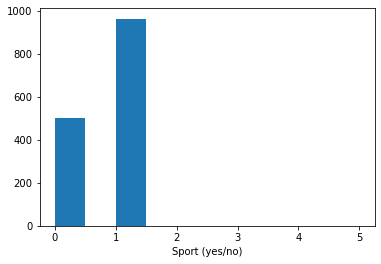

In [18]:
plt.hist(csv["Sport J/N"])
plt.xlabel("Sport (yes/no)")
plt.show()

First try to create a visualization using seaborn

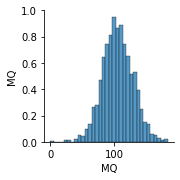

              MQ
6      80.050505
8      50.801282
9      72.235023
10     83.202100
11     84.274194
...          ...
1670    0.000000
1675   77.216749
1676   68.750000
1682  109.644670
1684   80.297398

[1564 rows x 1 columns]


In [19]:
import seaborn
dataframe = pd.DataFrame(csv["MQ"])
seaborn.pairplot(dataframe)
plt.show()
print(dataframe)

In [ ]:
# import seaborn
# dataframe = pd.DataFrame(csv)
# seaborn.pairplot(csv)
# plt.show()
# print(dataframe)

Visualization of BMI and the MQ score

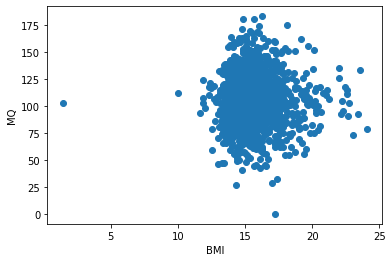

In [20]:
plt.scatter(csv["BMI"], csv["MQ"])
plt.xlabel("BMI")
plt.ylabel("MQ")
plt.show()

Visualization of the BMI

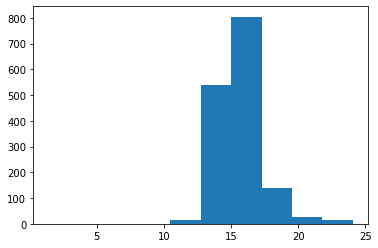

In [21]:
plt.hist(csv["BMI"])
plt.show()

Visualizations of the age (on test date) and BMI

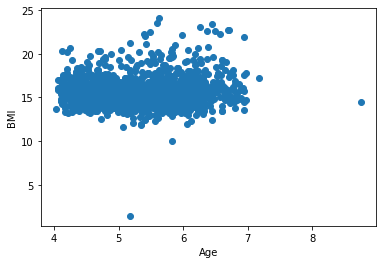

In [22]:
plt.scatter(csv["Leeftijd (op testdag)"], csv["BMI"])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

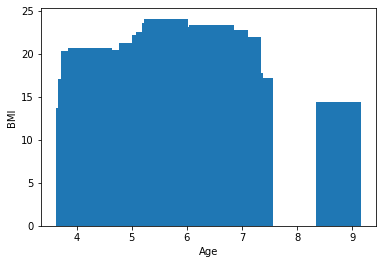

In [23]:
plt.bar(csv["Leeftijd (op testdag)"], csv["BMI"])
plt.xlabel("Age")
plt.ylabel("BMI")
plt.show()

Visualization of gender and BMI

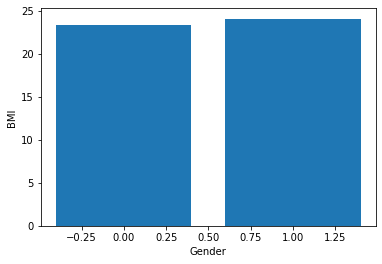

In [24]:
plt.bar(csv["Gender"], csv["BMI"])
plt.xlabel("Gender")
plt.ylabel("BMI")
plt.show()

Visualization of gender and the MQ score

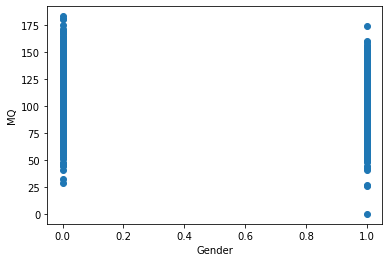

In [25]:
plt.scatter(csv["Gender"], csv["MQ"])
plt.xlabel("Gender")
plt.ylabel("MQ")
plt.show()

Visualization of BMI and the time the child needed to complete the test

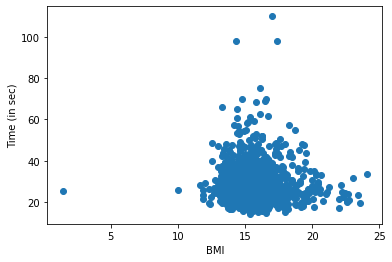

In [26]:
plt.scatter(csv["BMI"], csv["AST (tijd afgerond op 0.1s)"])
plt.xlabel("BMI")
plt.ylabel("Time (in sec)")
plt.show()

Visualization of time and age using seaborn

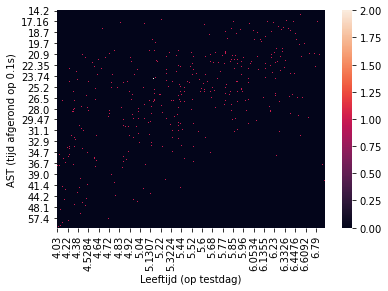

In [27]:
import seaborn as sns

result = pd.crosstab(csv["AST (tijd afgerond op 0.1s)"], csv["Leeftijd (op testdag)"])

sns.heatmap(result)

plt.show()


Visualization of the MQ score and use of TV etc.

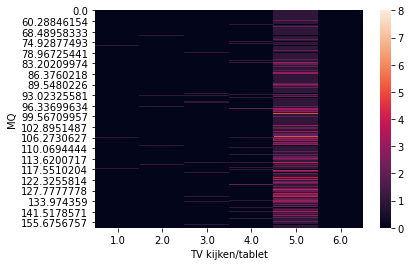

In [28]:
result = pd.crosstab(csv["MQ"], csv["TV kijken/tablet"])
result.sort_values('MQ', ascending=True)
sns.heatmap(result)

plt.show()

Visualization of whether a child does sports or not and gender

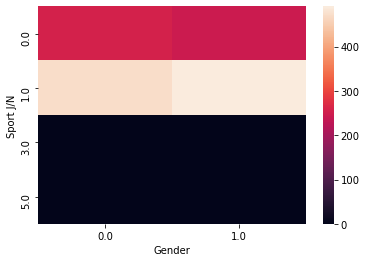

In [29]:
result = pd.crosstab(csv["Sport J/N"], csv["Gender"])
result.sort_values('Sport J/N', ascending=True)
sns.heatmap(result)

plt.show()

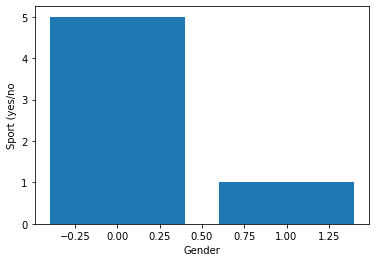

In [30]:
plt.bar(csv["Gender"], csv["Sport J/N"])
plt.xlabel("Gender")
plt.ylabel("Sport (yes/no")
plt.show()

Visualization of gender

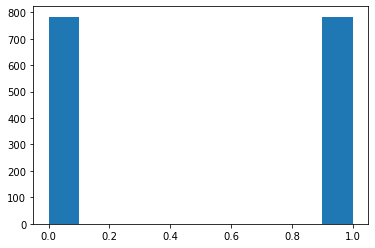

In [31]:
plt.hist(csv["Gender"])
plt.show()

Visualization of whether a child does sports or not

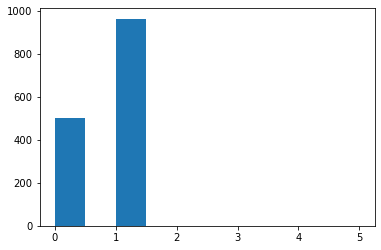

In [32]:
plt.hist(csv["Sport J/N"])
plt.show()